## Exercise 1

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc, stats
from skimage import img_as_float
%matplotlib inline

In [88]:
def iterated_conditonal_modes(unaries, beta, labels=None):
    shape = unaries.shape[0:2]
    n_labels = unaries.shape[2]

    if labels is None:
        labels = numpy.argmin(unaries, axis=2)
        
    continue_search = True
    while continue_search:
        continue_search = False

        for x0 in range(1, shape[0]-1):
            for x1 in range(1, shape[1]-1):
                current_label = labels[x0, x1]
                min_energy = float('inf')
                best_label = None

                for l in range(n_labels):
                    # unary terms
                    energy = unaries[x0, x1, l]

                    # pairwise terms
                    if l != labels[x0-1, x1]:
                        energy += beta
                    if l != labels[x0+1, x1]:
                        energy += beta
                    if l != labels[x0, x1-1]:
                        energy += beta
                    if l != labels[x0, x1+1]:
                        energy += beta

                    if energy < min_energy:
                        min_energy = energy
                        best_label = l

                if best_label != current_label:
                    labels[x0, x1] = best_label
                    continue_search = True

    
    return labels

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


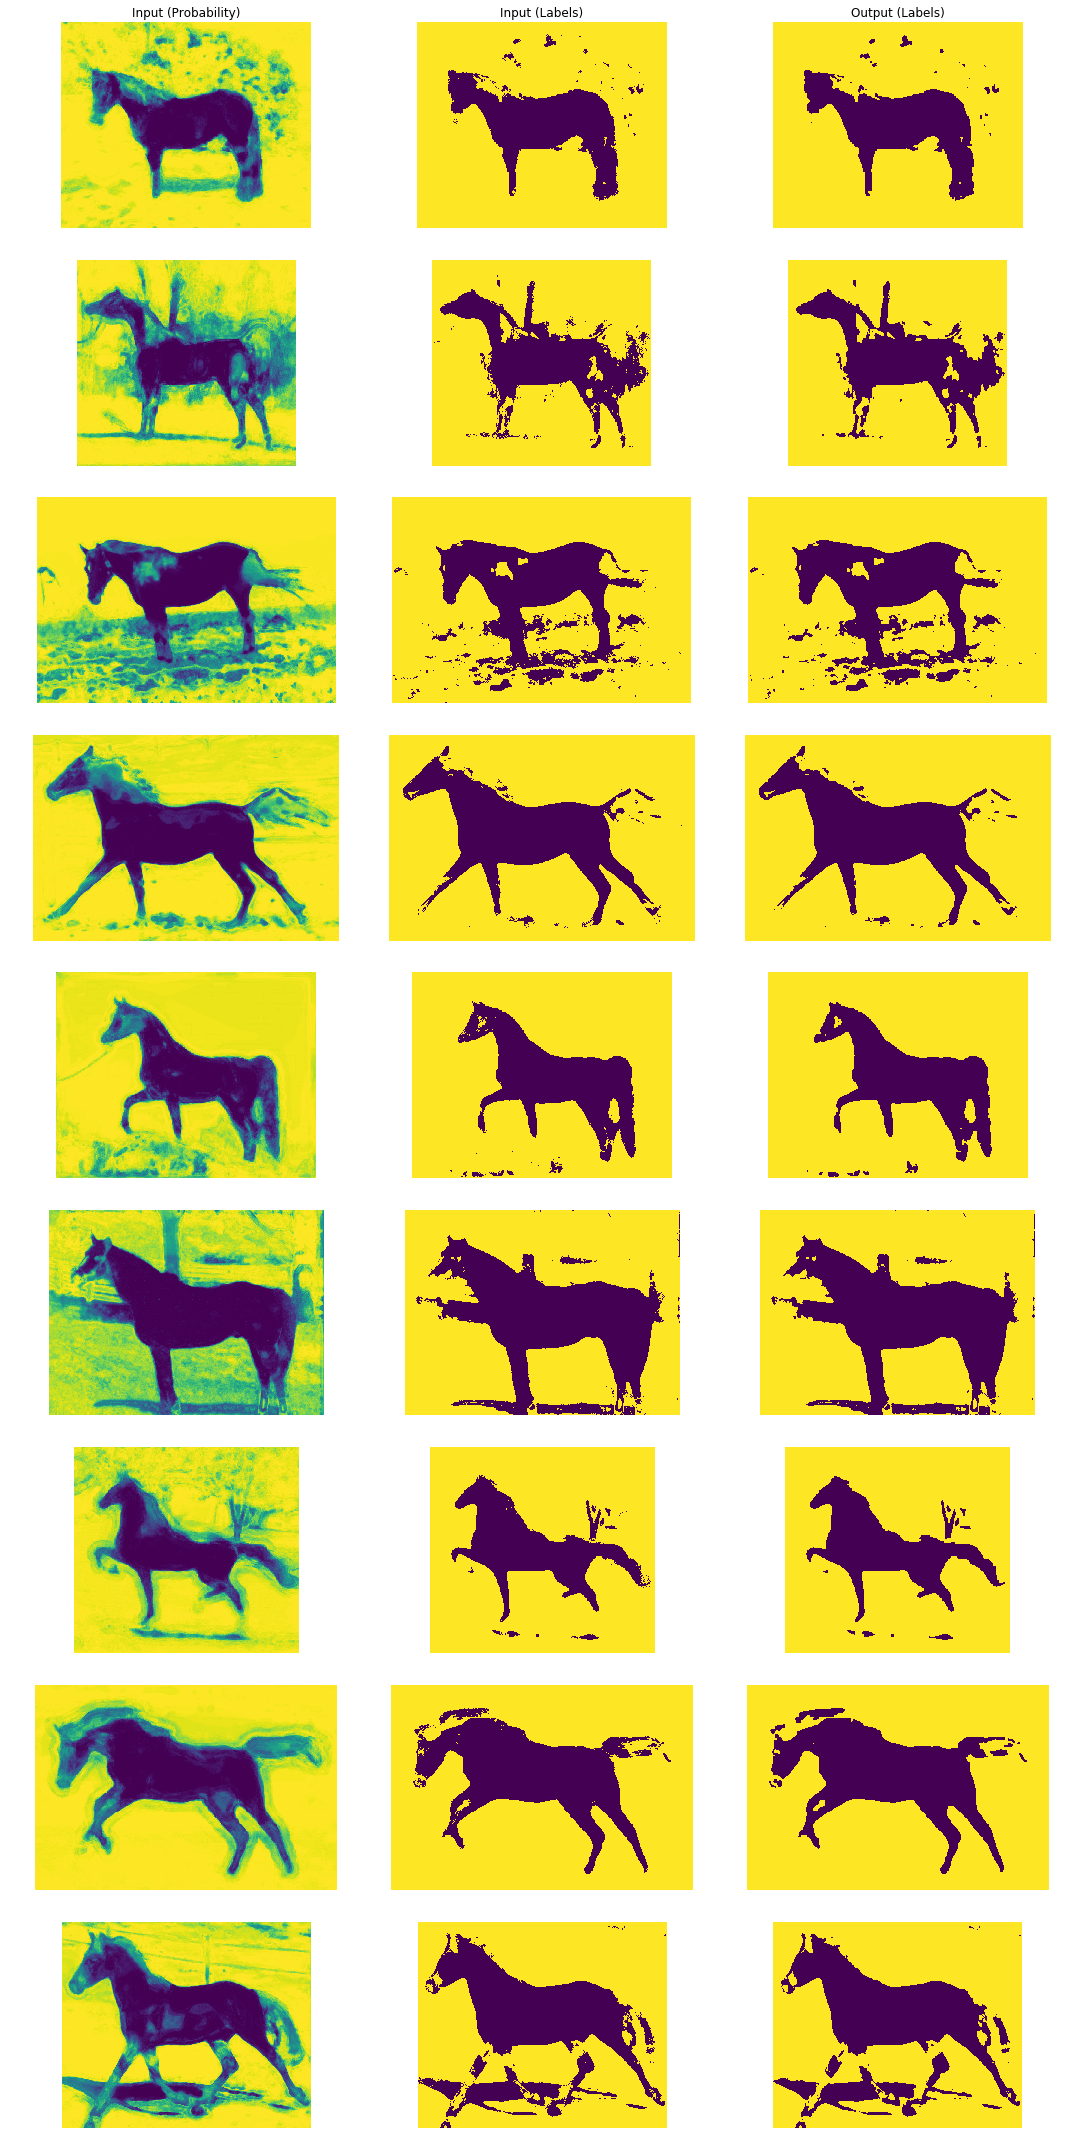

In [89]:
n_imgs = 9
n_labels = 2

# regularizer strength
beta = 10

fig, axs = plt.subplots(n_imgs, 3, figsize=(15, 30))
axs[0, 0].set_title('Input (Probability)')
axs[0, 1].set_title('Input (Labels)')
axs[0, 2].set_title('Output (Labels)')
for imgnr in range(n_imgs):
    in_file = ndimage.imread('out%d.png' % imgnr)
    shape = in_file.shape
    
    # Load output from exercise 01
    prob_horse = img_as_float(in_file)
    
    # Normalize
    prob_horse = prob_horse / np.max(prob_horse)
    
    # Avoid zero probabilities
    prob_horse = np.clip(prob_horse, 0.00001, 0.99999)
    
    axs[imgnr, 0].imshow(prob_horse)
    axs[imgnr, 0].axis('off')
    axs[imgnr, 1].imshow(prob_horse > 0.5)
    axs[imgnr, 1].axis('off')

    # Unary factors: Negative logarithm of probability
    unaries = np.zeros(shape + (2,))
    unaries[:, :, 0] = - np.log(prob_horse)
    unaries[:, :, 1] = - np.log(1 - prob_horse)
    
    labels = iterated_conditonal_modes(unaries, beta=beta)
    axs[imgnr, 2].imshow(1 - labels)
    axs[imgnr, 2].axis('off')

fig.tight_layout()
fig.show()

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


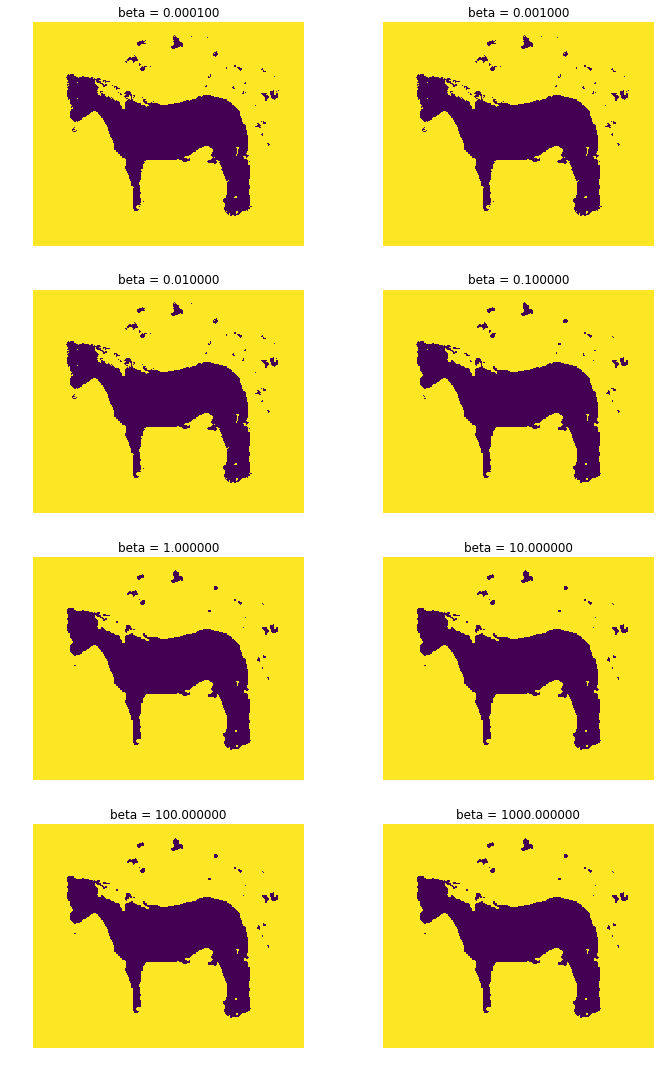

In [90]:
n_imgs = 9
n_labels = 2

in_file = ndimage.imread('out0.png')
shape = in_file.shape

# Load output from exercise 01
prob_horse = img_as_float(in_file)

# Normalize
prob_horse = prob_horse / np.max(prob_horse)

# Avoid zero probabilities
prob_horse = np.clip(prob_horse, 0.00001, 0.99999)

# Unary factors: Negative logarithm of probability
unaries = np.zeros(shape + (2,))
unaries[:, :, 0] = - np.log(prob_horse)
unaries[:, :, 1] = - np.log(1 - prob_horse)

betas = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000)
fig, axs = plt.subplots(int(np.ceil(len(betas) / 2)), 2, figsize=(10, 15))

for i, beta in enumerate(betas):
    labels = iterated_conditonal_modes(unaries, beta=beta)
    axs[i//2, i % 2].set_title('beta = %f' % beta)
    axs[i//2, i % 2].imshow(1 - labels)
    axs[i//2, i % 2].axis('off')
    
axs[i//2, 1].axis('off')
fig.tight_layout()
fig.show()

Different values of beta make the smoothing stronger, i.e. small objects are more strongly penalized. However, the overall performance is still a bit disappointing. We believe that the reason for this is that the penalty only takes the very next neighbors into account which is a way to small radius to work well on a picture of this size.

## Exercise 2

1. The new random variable $x_z$ can take 8 different values, one for each combination of $x_1, x_2, x_3$. We will name them 1-8 in the order they are presented in the table of the exercise sheet.

2. The energies of the pairwise factors $\phi_{iz}(x_i, x_z)$ are then given by $E = E_0 \times E_1 \times E_2$ using the $E_k$ values from the following table:


| $x_i, i \in \{0, 1, 2 \}$ | 0         | 0         | 0         | 0         | 0         | 0         | 0         | 0        | 1        | 1         | 1         | 1         | 1         | 1         | 1         | 1         |
|---------------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| $x_z$                     | 1         | 2         | 3         | 4         | 5         | 6         | 7         | 8        | 1        | 2         | 3         | 4         | 5         | 6         | 7         | 8         |
| $E_0$                     | $a^{1/3}$ | $b^{1/3}$ | $c^{1/3}$ | $d^{1/3}$ | $\infty$  | $\infty$  | $\infty$  | $\infty$ | $\infty$ | $\infty$  | $\infty$  | $\infty$  | $e^{1/3}$ | $f^{1/3}$ | $g^{1/3}$ | $h^{1,3}$ |
| $E_1$                     | $a^{1/3}$ | $b^{1/3}$ | $\infty$  | $\infty$  | $e^{1/3}$ | $f^{1/3}$ | $\infty$  | $\infty$ | $\infty$ | $\infty$  | $c^{1/3}$ | $d^{1/3}$ | $\infty$  | $\infty$  | $g^{1/3}$ | $h^{1,3}$ |
| $E_2$                     | $a^{1/3}$ | $\infty$  | $c^{1/3}$ | $\infty$  | $e^{1/3}$ | $\infty$  | $g^{1/3}$ | $\infty$ | $\infty$ | $b^{1/3}$ | $\infty$  | $d^{1/3}$ | $\infty$  | $f^{1/3}$ | $\infty$  | $h^{1,3}$ |